# Handling Missing Categorical Data

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [146]:
data=pd.read_csv('../../data/house_data.csv')
data.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1414,1415,50,RL,64.0,13053,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,207000
527,528,60,RL,67.0,14948,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,446261
260,261,80,RL,120.0,19296,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2009,WD,Normal,176000
798,799,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,485000
1238,1239,20,RL,63.0,13072,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Abnorml,142500
1123,1124,20,RL,50.0,9405,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,118000
1357,1358,20,RL,NaN,12537,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,149900
524,525,60,RL,95.0,11787,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,315750
458,459,70,RM,NaN,5100,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,161000
1119,1120,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2006,WD,Normal,133700


In [147]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [148]:
df=data[['GarageQual','FireplaceQu','SalePrice']]
df.sample(10)

,GarageQual,FireplaceQu,SalePrice
422,TA,NaN,113000
684,TA,NaN,221000
1051,TA,Gd,200141
1312,Gd,Ex,302000
256,TA,NaN,207500
1364,TA,NaN,144152
621,TA,TA,240000
200,TA,NaN,140000
127,NaN,TA,87000
117,TA,NaN,155000


In [149]:
df.isnull().mean()*100

GarageQual      5.547945
FireplaceQu    47.260274
SalePrice       0.000000
dtype: float64

In [150]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

<Axes: xlabel='GarageQual'>

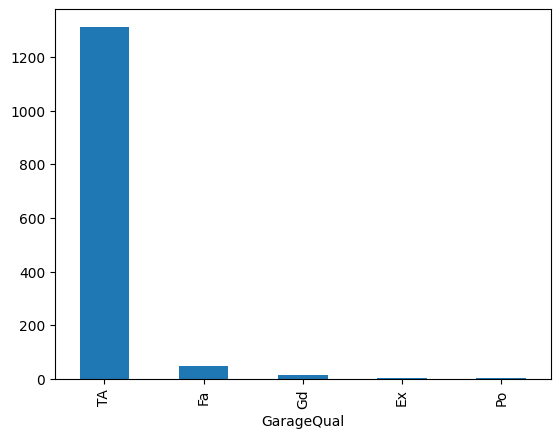

In [151]:
df['GarageQual'].value_counts().plot(kind='bar')

<Axes: xlabel='FireplaceQu'>

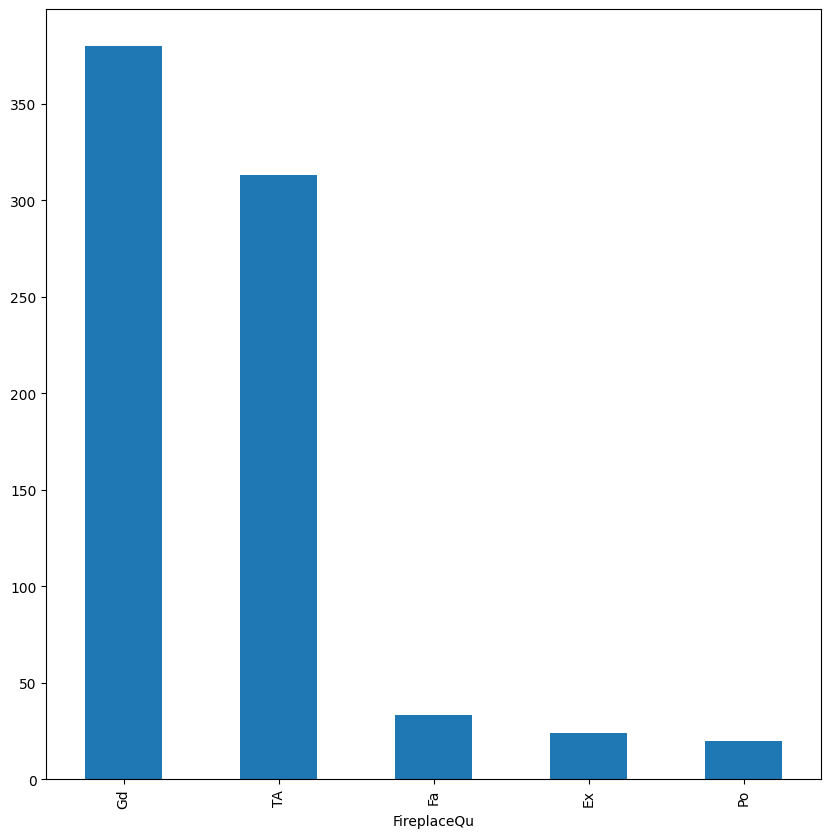

In [152]:
df['FireplaceQu'].value_counts().plot(kind='bar',figsize=(10,10))

<Axes: ylabel='Density'>

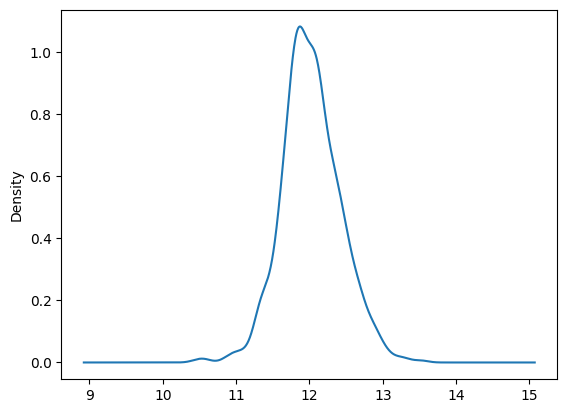

In [153]:
np.log1p(df['SalePrice']).plot(kind='kde')

## Most Frequent Imputation

In [154]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

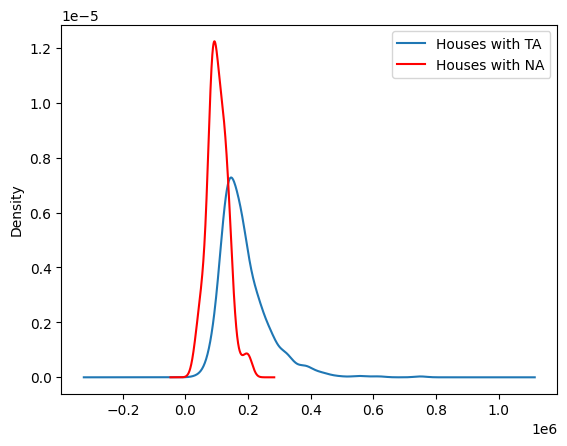

In [155]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')


In [156]:
temp=df[df['GarageQual']=='TA']['SalePrice']
type(temp)

pandas.core.series.Series

In [157]:
df['GarageQual'].value_counts()['TA']

1311

<Axes: xlabel='GarageQual'>

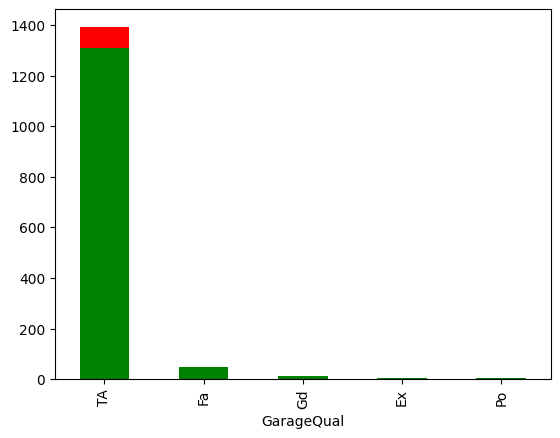

In [158]:
df['GarageQual'].fillna('TA').value_counts().plot(kind='bar',color='red')
df['GarageQual'].value_counts().plot(kind='bar',color='green')

In [159]:
df['GarageQual'].fillna('TA',inplace=True)

C:\Users\shafe\AppData\Local\Temp\ipykernel_23608\584385255.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA',inplace=True)
C:\Users\shafe\AppData\Local\Temp\ipykernel_23608\584385255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageQual'].fillna('TA',inplace=True)


In [160]:
df['GarageQual'].isna().sum()

0

Text(0.5, 1.0, 'GarageQual')

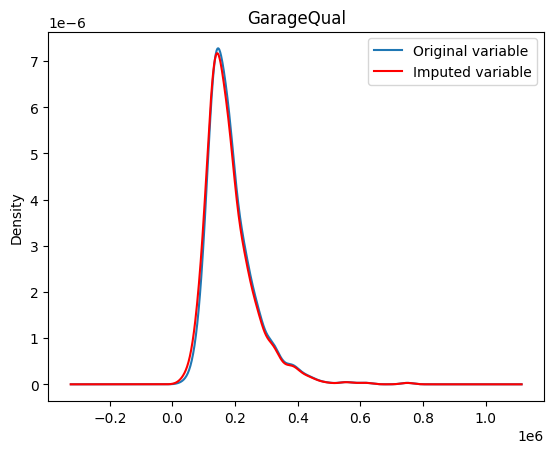

In [161]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

This graph shows that SalePrices Distribution changes according to fillna('TA')

<Axes: xlabel='FireplaceQu'>

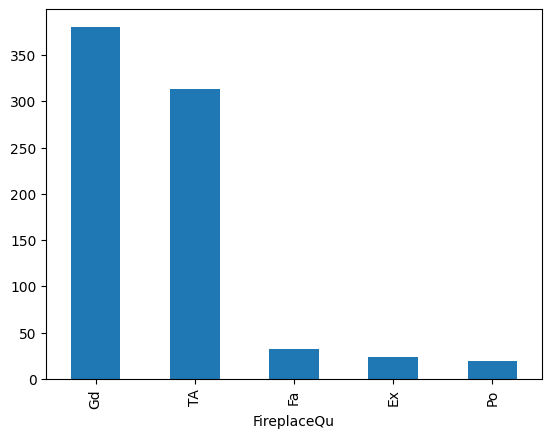

In [162]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [163]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

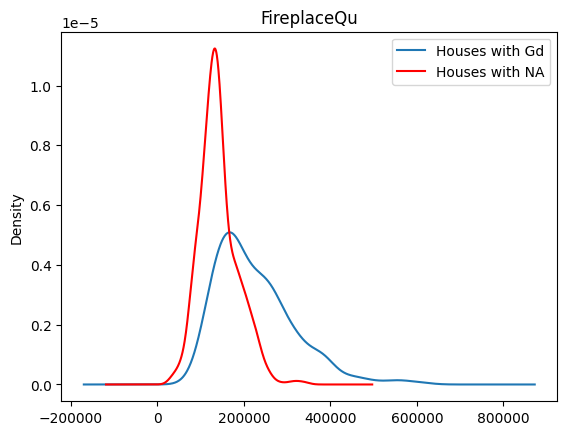

In [164]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')




<Axes: xlabel='GarageQual'>

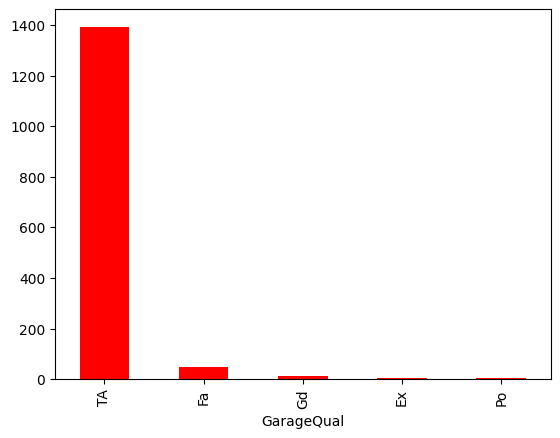

In [165]:
df['GarageQual'].fillna('Gd').value_counts().plot(kind='bar',color='red')
df['GarageQual'].value_counts().plot(kind='bar',color='green')

C:\Users\shafe\AppData\Local\Temp\ipykernel_23608\407310177.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd',inplace=True)
C:\Users\shafe\AppData\Local\Temp\ipykernel_23608\407310177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FireplaceQu'].fillna('Gd',inplace=True)


Text(0.5, 1.0, 'FireplaceQu')

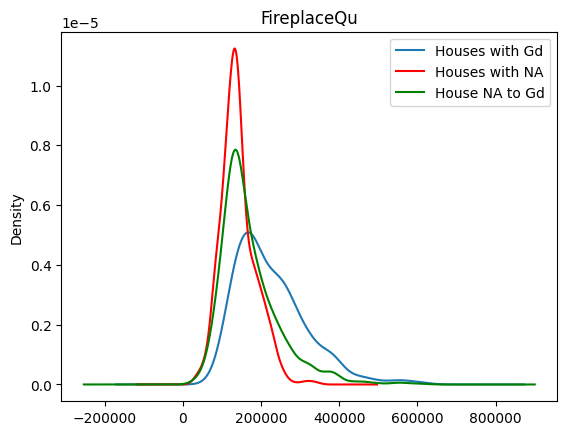

In [166]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

df['FireplaceQu'].fillna('Gd',inplace=True)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA','House NA to Gd']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

### With SkLearn

In [167]:

# from sklearn.model_selection import train_test_split

# X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

imputer.statistics_

c:\Users\shafe\anaconda3\envs\DeepLearning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array(['TA', 'Gd'], dtype=object)

## Arbitarary Imputer

In [168]:
df=data[['GarageQual','FireplaceQu','SalePrice']]
df.sample(6)

,GarageQual,FireplaceQu,SalePrice
524,TA,TA,315750
144,TA,NaN,125000
657,TA,Gd,149000
549,TA,Gd,263000
1125,Fa,TA,115000
691,TA,Ex,755000


<Axes: xlabel='GarageQual'>

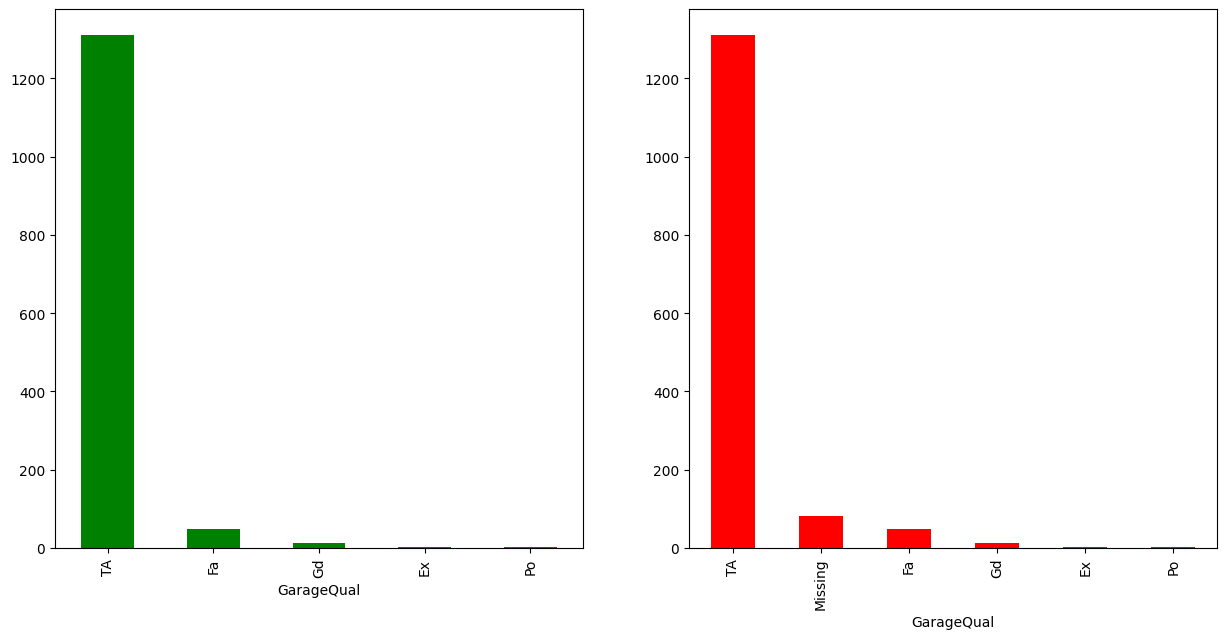

In [178]:
plt.figure(figsize=(15,7))
plt.subplot(121)
df['GarageQual'].value_counts().plot(kind='bar',color='green')
plt.subplot(122)
df['GarageQual'].fillna('Missing').value_counts().plot(kind='bar',color='red')

In [179]:
df['GarageQual'].fillna('Missing', inplace=True)

C:\Users\shafe\AppData\Local\Temp\ipykernel_23608\4070582888.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('Missing', inplace=True)
C:\Users\shafe\AppData\Local\Temp\ipykernel_23608\4070582888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageQual'].fillna('Missing', inplace=True)


In [180]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

imputer.statistics_

array(['Missing', 'Missing'], dtype=object)